In [1]:
import pandas as pd
import numpy as np

In [2]:
df_jan = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet")
df_feb = pd.read_parquet("https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet")

## Q1: Number of records

In [3]:
len(df_jan)

1154112

In [4]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
dispatching_base_num      1154112 non-null object
pickup_datetime           1154112 non-null datetime64[ns]
dropOff_datetime          1154112 non-null datetime64[ns]
PUlocationID              195845 non-null float64
DOlocationID              991892 non-null float64
SR_Flag                   0 non-null object
Affiliated_base_number    1153227 non-null object
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


## Q2: Average duration in January

In [5]:
df_jan["duration"] = df_jan["dropOff_datetime"] - df_jan["pickup_datetime"]
df_jan["duration"] = df_jan["duration"].apply(lambda x: x.total_seconds() / 60)
df_jan["duration"].mean()

19.167224093791006

## Data preparation

In [6]:
import seaborn as sns

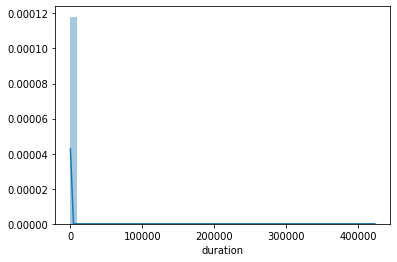

In [7]:
sns.distplot(df_jan["duration"])

In [8]:
df_jan = df_jan[(df_jan.duration >= 1)&(df_jan.duration<=60)]

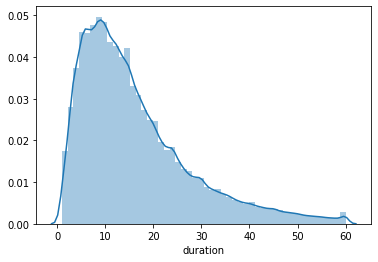

In [9]:
sns.distplot(df_jan["duration"])

## Q3: Missing values

In [10]:
df_jan.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number',
       'duration'],
      dtype='object')

In [11]:
df_jan["PUlocationID"] = df_jan["PUlocationID"].fillna(-1)
df_jan["DOlocationID"] = df_jan["DOlocationID"].fillna(-1)

In [12]:
100 * (df_jan["PUlocationID"] == -1).sum() / len(df_jan["PUlocationID"])

83.52732770722618

## Q4: One-hot-encoding

In [13]:
from sklearn.feature_extraction import DictVectorizer

features = ["PUlocationID", "DOlocationID"]
df_jan[features] = df_jan[features].astype(str) # all features are categorical
train_dicts = df_jan[features].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train.shape

(1109826, 525)

## Q5: Training a model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
y_train = df_jan["duration"].values
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_train, model.predict(X_train), squared=False)

10.528519107211306

## Q6: Evaluating the model

In [18]:
df_feb["duration"] = df_feb["dropOff_datetime"] - df_feb["pickup_datetime"]
df_feb["duration"] = df_feb["duration"].apply(lambda x: x.total_seconds() / 60)
df_feb = df_feb[(df_feb.duration >= 1)&(df_feb.duration<=60)]

In [21]:
#df_feb[features] = df_feb[features].fillna(-1)
#df_feb[features] = df_feb[features].astype(str)
df_feb["DOlocationID"] = df_feb["DOlocationID"].fillna(-1)
df_feb["PUlocationID"] = df_feb["PUlocationID"].fillna(-1)
df_feb[features] = df_feb[features].astype(str)

val_dicts = df_feb[features].to_dict(orient="records")
X_val = dv.transform(val_dicts)
y_val = df_feb["duration"].values

In [22]:
mean_squared_error(y_val, model.predict(X_val), squared=False)

11.01428319227392